In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/sales_dataset.csv')

Data Cleaning

In [ ]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Drop the unwanted column
if 'Unnamed: 22' in df.columns:
    df.drop(columns=['Unnamed: 22'], inplace=True)


In [ ]:
#Removing extra space and organizing our data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [ ]:
print(df['date'].head())
print(df['date'].dtype)

0    04-30-22
1    04-30-22
2    04-30-22
3    04-30-22
4    04-30-22
Name: date, dtype: object
object


In [ ]:
#Working on the datatype

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['ship_postal_code'] = df['ship_postal_code'].astype(str).replace('<NA>', '')
df['qty'] = df['qty'].astype('int64')
df['amount'] = df['amount'].astype('float64')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 128943 entries, 0 to 128948
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            128943 non-null  object        
 1   date                128943 non-null  datetime64[ns]
 2   status              128943 non-null  object        
 3   fulfilment          128943 non-null  object        
 4   sales_channel       128943 non-null  object        
 5   ship_service_level  128943 non-null  object        
 6   style               128943 non-null  object        
 7   sku                 128943 non-null  object        
 8   category            128943 non-null  object        
 9   size                128943 non-null  object        
 10  asin                128943 non-null  object        
 11  courier_status      122072 non-null  object        
 12  qty                 128943 non-null  int64         
 13  currency            121152 non-nul

In [ ]:
# Check missing values
print(df.isna().sum())

order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6871
qty                       0
currency               7791
amount                 7791
ship_city                33
ship_state               33
ship_postal_code          0
ship_country             33
promotion_ids         49139
b2b                       0
fulfilled_by          89673
dtype: int64


In [ ]:
# Numeric summary
df.describe()

# Categorical summary
df.describe(include=['object', 'bool', 'category'])


,order_id,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,asin,courier_status,currency,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
count,128943,128943,128943,128943,128943,128943,128943,128943,128943,128943,122072,121152,128910,128910,128943,128910,79804,128943,39270
unique,120352,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,9460,1,5787,2,1
top,403-4984515-8861958,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,201301.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship
freq,12,77764,89673,128819,88590,4224,773,50272,22703,773,109460,121152,11211,22256,1006,128910,46089,128072,39270


Let get to know our data

In [ ]:
print("Minimum Date:", df['date'].min())
print("Maximum Date:", df['date'].max())

print(df['date'].dt.year.value_counts())

Minimum Date: 2022-03-31 00:00:00
Maximum Date: 2022-06-29 00:00:00
date
2022    128943
Name: count, dtype: int64


In [ ]:
df['category'] = df['category'].fillna("Unknown")
df['category'] = df['category'].astype(str).str.strip().str.title()

print(df['category'].unique())

['Set' 'Kurta' 'Western Dress' 'Top' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse' 'Dupatta']


In [ ]:
df['status'] = df['status'].fillna("Unknown")

df['status'] = df['status'].astype(str).str.strip().str.title()

print(df['status'].unique())

['Cancelled' 'Shipped - Delivered To Buyer' 'Shipped'
 'Shipped - Returned To Seller' 'Shipped - Rejected By Buyer'
 'Shipped - Lost In Transit' 'Shipped - Out For Delivery'
 'Shipped - Returning To Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting For Pick Up' 'Shipped - Damaged' 'Shipping']


In [ ]:
status_mapping = {
    'Cancelled': 'Cancelled',
    'Shipped': 'Shipped',
    'Shipping': 'Shipped',
    'Shipped - Out For Delivery': 'Out for Delivery',
    'Shipped - Picked Up': 'Picked Up',
    'Shipped - Delivered To Buyer': 'Delivered',
    'Shipped - Returned To Seller': 'Returned',
    'Shipped - Returning To Seller': 'Returned',
    'Shipped - Rejected By Buyer': 'Rejected',
    'Shipped - Damaged': 'Damaged',
    'Shipped - Lost In Transit': 'Lost',
    'Pending': 'Pending',
    'Pending - Waiting For Pick Up': 'Pending'
}

df['status'] = df['status'].map(status_mapping).fillna('Other')

print(df['status'].unique())

['Cancelled' 'Delivered' 'Shipped' 'Returned' 'Rejected' 'Lost'
 'Out for Delivery' 'Picked Up' 'Pending' 'Damaged']


In [ ]:
df['fulfilment'] = df['fulfilment'].fillna("Unknown")
print(df['fulfilment'].unique())

['Merchant' 'Amazon']


In [ ]:
df['sales_channel'] = df['sales_channel'].fillna("Unknown")

print(df['sales_channel'].unique())

['Amazon.in' 'Non-Amazon']


In [ ]:
df['ship_service_level'] = df['ship_service_level'].fillna("Unknown")
df['ship_service_level'] = df['ship_service_level'].astype(str).str.strip().str.title()

print(df['ship_service_level'].unique())

['Standard' 'Expedited']


In [ ]:
df['style'] = df['style'].fillna("Unknown")
df['style'] = df['style'].astype(str)

print(df['style'].unique()[:30])

['SET389' 'JNE3781' 'JNE3371' 'J0341' 'JNE3671' 'SET264' 'J0095' 'JNE3405'
 'SET200' 'JNE3461' 'JNE3160' 'JNE3500' 'SET254' 'JNE3795' 'SET345'
 'JNE3373' 'SET291' 'MEN5002' 'NW030' 'JNE3415' 'PJNE2199' 'JNE3567'
 'JNE2132' 'MEN5009' 'J0011' 'JNE3766' 'MEN5001' 'JNE3787' 'JNE3543'
 'J0211']


In [ ]:
df['sku'] = df['sku'].astype(str)
print("Nulls in SKU:", df['sku'].isnull().sum())
print("Unique SKUs:", df['sku'].nunique())

Nulls in SKU: 0
Unique SKUs: 7195


In [ ]:
df['courier_status'] = df['courier_status'].fillna('Unknown')
df['courier_status'] = df['courier_status'].astype(str)
print(df['courier_status'].unique())

['Unknown' 'Shipped' 'Cancelled' 'Unshipped']


In [ ]:
df['size'] = df['size'].fillna("Unknown")

df['size'] = df['size'].astype(str).str.strip().str.upper()

print(df['size'].unique())

['S' '3XL' 'XL' 'L' 'XXL' 'M' 'XS' '6XL' '4XL' '5XL' 'FREE']


In [ ]:
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')
df['qty'] = df['qty'].fillna(df['qty'].median())

print(df['qty'].describe())

count    128943.000000
mean          0.904648
std           0.314758
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: qty, dtype: float64


In [ ]:
print(df['asin'].nunique())

7190


In [ ]:
df['currency'] = df['currency'].fillna("Unknown")
df['currency'] = df['currency'].astype(str).str.strip().str.upper()

print(df['currency'].unique())

['INR' 'UNKNOWN']


In [ ]:
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

median_value = df.loc[df['amount'] != 0, 'amount'].median()
df['amount'] = df['amount'].fillna(median_value)
df.loc[df['status'] == "Cancelled", 'amount'] = 0
print(df['amount'].describe())

count    128943.000000
mean        556.758417
std         346.496085
min           0.000000
25%         376.000000
50%         545.000000
75%         760.000000
max        5584.000000
Name: amount, dtype: float64


In [ ]:
df['ship_city'] = df['ship_city'].fillna("Unknown")
df['ship_city'] = df['ship_city'].astype(str).str.strip().str.title()

print(df['ship_city'].unique()[:30])

['Mumbai' 'Bengaluru' 'Navi Mumbai' 'Puducherry' 'Chennai' 'Ghaziabad'
 'Chandigarh' 'Hyderabad' 'Noida' 'Amravati.' 'Tiruchirappalli' 'Pune'
 'Tezpur' 'Ranchi' 'Bilaspur' 'Guwahati' 'Thiruvarur' 'Lucknow'
 'Visakhapatnam' 'Jeypur' 'New Delhi' 'Thiruvananthapuram' 'Greater Noida'
 'Jabalpur' 'Kolkata' 'Ongole' 'Secunderabad' 'Kewalpur' 'Cuttack'
 'Badlapur']


In [ ]:
df['ship_state'] = df['ship_state'].fillna("Unknown")
df['ship_state'] = df['ship_state'].astype(str).str.strip().str.title()

print(df['ship_state'].unique()[:50])

['Maharashtra' 'Karnataka' 'Puducherry' 'Tamil Nadu' 'Uttar Pradesh'
 'Chandigarh' 'Telangana' 'Assam' 'Jharkhand' 'Chhattisgarh'
 'Andhra Pradesh' 'Odisha' 'Delhi' 'Kerala' 'Madhya Pradesh' 'West Bengal'
 'Nagaland' 'Rajasthan' 'Gujarat' 'Uttarakhand' 'Bihar' 'Jammu & Kashmir'
 'Haryana' 'Punjab' 'Himachal Pradesh' 'Arunachal Pradesh' 'Manipur' 'Goa'
 'Meghalaya' 'Tripura' 'Ladakh' 'Dadra And Nagar' 'Sikkim' 'Unknown'
 'Andaman & Nicobar' 'Rajshthan' 'Nl' 'Mizoram' 'New Delhi'
 'Punjab/Mohali/Zirakpur' 'Rj' 'Orissa' 'Lakshadweep' 'Pb' 'Apo' 'Ar'
 'Pondicherry' 'Rajsthan']


In [ ]:
state_mapping = {
    'Rajshthan': 'Rajasthan',
    'Rajsthan': 'Rajasthan',
    'Rj': 'Rajasthan',
    'Orissa': 'Odisha',
    'Pondicherry': 'Puducherry',
    'Pb': 'Punjab',
    'Punjab/Mohali/Zirakpur': 'Punjab',
    'Nl': 'Nagaland',
    'Ar': 'Arunachal Pradesh',
    'New Delhi': 'Delhi',
    'Apo': 'Unknown'
}

df['ship_state'] = df['ship_state'].replace(state_mapping)

print(df['ship_state'].nunique())
print(df['ship_state'].unique())

37
['Maharashtra' 'Karnataka' 'Puducherry' 'Tamil Nadu' 'Uttar Pradesh'
 'Chandigarh' 'Telangana' 'Assam' 'Jharkhand' 'Chhattisgarh'
 'Andhra Pradesh' 'Odisha' 'Delhi' 'Kerala' 'Madhya Pradesh' 'West Bengal'
 'Nagaland' 'Rajasthan' 'Gujarat' 'Uttarakhand' 'Bihar' 'Jammu & Kashmir'
 'Haryana' 'Punjab' 'Himachal Pradesh' 'Arunachal Pradesh' 'Manipur' 'Goa'
 'Meghalaya' 'Tripura' 'Ladakh' 'Dadra And Nagar' 'Sikkim' 'Unknown'
 'Andaman & Nicobar' 'Mizoram' 'Lakshadweep']


In [ ]:
df['ship_country'] = df['ship_country'].fillna("Unknown")
df['ship_country'] = df['ship_country'].astype(str).str.strip().str.upper()

print(df['ship_country'].unique())

['IN' 'UNKNOWN']


In [ ]:
df['ship_postal_code'] = pd.to_numeric(df['ship_postal_code'], errors='coerce')  # make numeric
df['ship_postal_code'] = df['ship_postal_code'].fillna(-1).astype(int)
df['ship_postal_code'] = df['ship_postal_code'].fillna("Unknown")

print(df['ship_postal_code'].unique()[:30])

[400081 560085 410210 605008 600073 201102 160036 500032 500008 600041
 201303 444606 560017 620018 560040 500072 411044 784001 834002 495001
 411052 560037 781003 613704 226010 530016 764001 500028 226016 600033]


FINANCE ANALYSIS

In [ ]:
def get_top_n(dataframe, column, value, n=5, sort_ascending=False):
    return dataframe.groupby(column)[value].sum().nlargest(n)

1. Revenue by Month


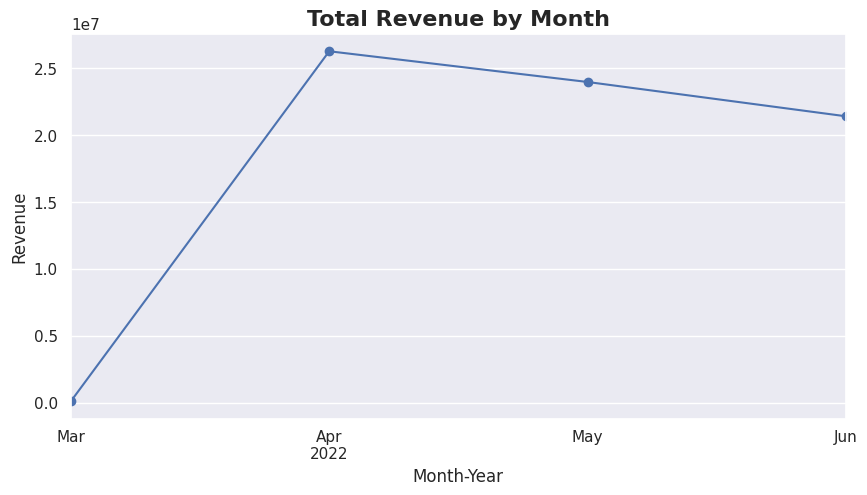

In [ ]:
df['year_month'] = df['date'].dt.to_period('M')
revenue_trend = df.groupby('year_month')['amount'].sum()

revenue_trend.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Total Revenue by Month", fontsize=16, fontweight='bold')
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.show()


2. Best-Selling Products

category
Set              35785493.14
Kurta            19481051.48
Western Dress    10209098.00
Top               4909759.00
Ethnic Dress       732138.00
Blouse             420877.00
Bottom             136075.00
Saree              114694.00
Dupatta               915.00
Name: amount, dtype: float64


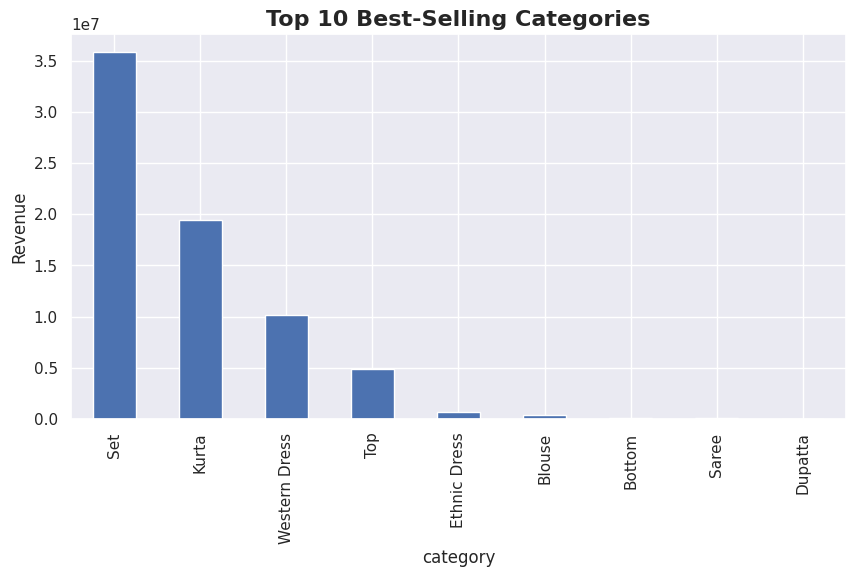

In [ ]:
category_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False).head(10)
print(category_sales)

category_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Best-Selling Categories", fontsize=16, fontweight='bold')
plt.ylabel("Revenue")
plt.show()

3. Weekly Sales by Weekdays

In [ ]:
weekly_revenue_series = df.groupby(df['date'].dt.day_name())['amount'].sum()
weekly_revenue = weekly_revenue_series.reset_index()
weekly_revenue.columns = ['Day_Name', 'Total_Amount']

weekday_order_full = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_revenue['Day_Name'] = pd.Categorical(
    weekly_revenue['Day_Name'],
    categories=weekday_order_full,
    ordered=True
)
weekly_revenue = weekly_revenue.sort_values('Day_Name')

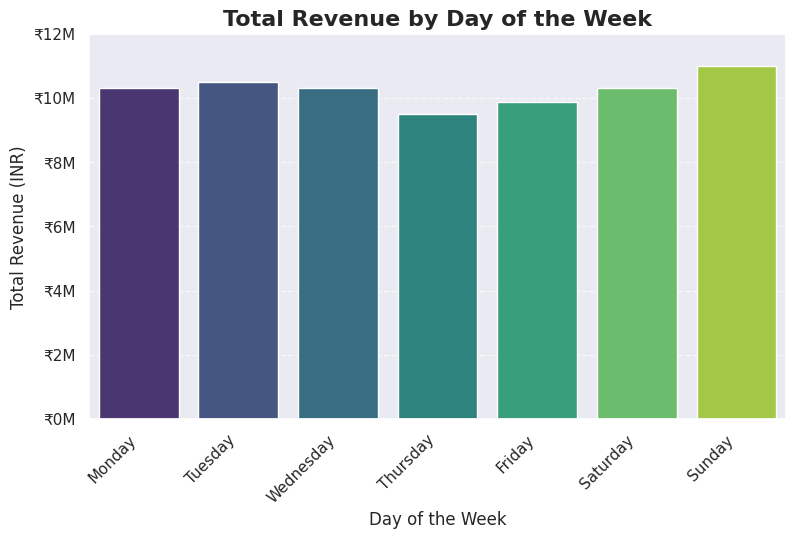

In [ ]:
import seaborn as sns
plt.figure(figsize=(9, 5))
sns.barplot(
    x='Day_Name',
    y='Total_Amount',
    data=weekly_revenue,
    hue='Day_Name',
    palette='viridis',
    legend=False
)

plt.xticks(rotation=45, ha='right')

current_ticks = plt.gca().get_yticks()
plt.gca().set_yticks(current_ticks)

plt.gca().set_yticklabels(['₹{:,.0f}M'.format(x/1_000_000) for x in current_ticks])

plt.title('Total Revenue by Day of the Week', fontsize=16, fontweight='bold')
plt.ylabel('Total Revenue (INR)')
plt.xlabel('Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)


4. Average Order Revenue

In [ ]:
total_revenue = df['amount'].sum()
total_orders = df['order_id'].nunique()
aov = total_revenue / total_orders

print("Average Order Value (AOV):", round(aov,2))

Average Order Value (AOV): 596.5


CUSTOMER INSIGHTS ANALYSIS

1. Order Trends

In [ ]:
total_orders = df['order_id'].nunique()
cancelled_orders = df[df['status']== "Cancelled"]['order_id'].nunique()
cancellation_rate = (cancelled_orders / total_orders) * 100

print("Cancellation Rate:", round(cancellation_rate, 2), "%")

Cancellation Rate: 14.29 %


In [ ]:
total_orders = df['order_id'].nunique()
rejected_orders = df[df['status']== "Rejected"]['order_id'].nunique()
rejected_rate = (rejected_orders / total_orders) * 100

print("Rejection Rate:", round(rejected_rate, 2), "%")

Rejection Rate: 0.01 %


2. Sales by City

ship_city
Bengaluru    6726061.00
Hyderabad    5087098.57
Mumbai       3958748.00
New Delhi    3636084.48
Chennai      3299494.00
Pune         2579430.00
Kolkata      1548410.00
Gurugram     1190925.00
Thane        1016372.00
Lucknow       958626.00
Name: amount, dtype: float64


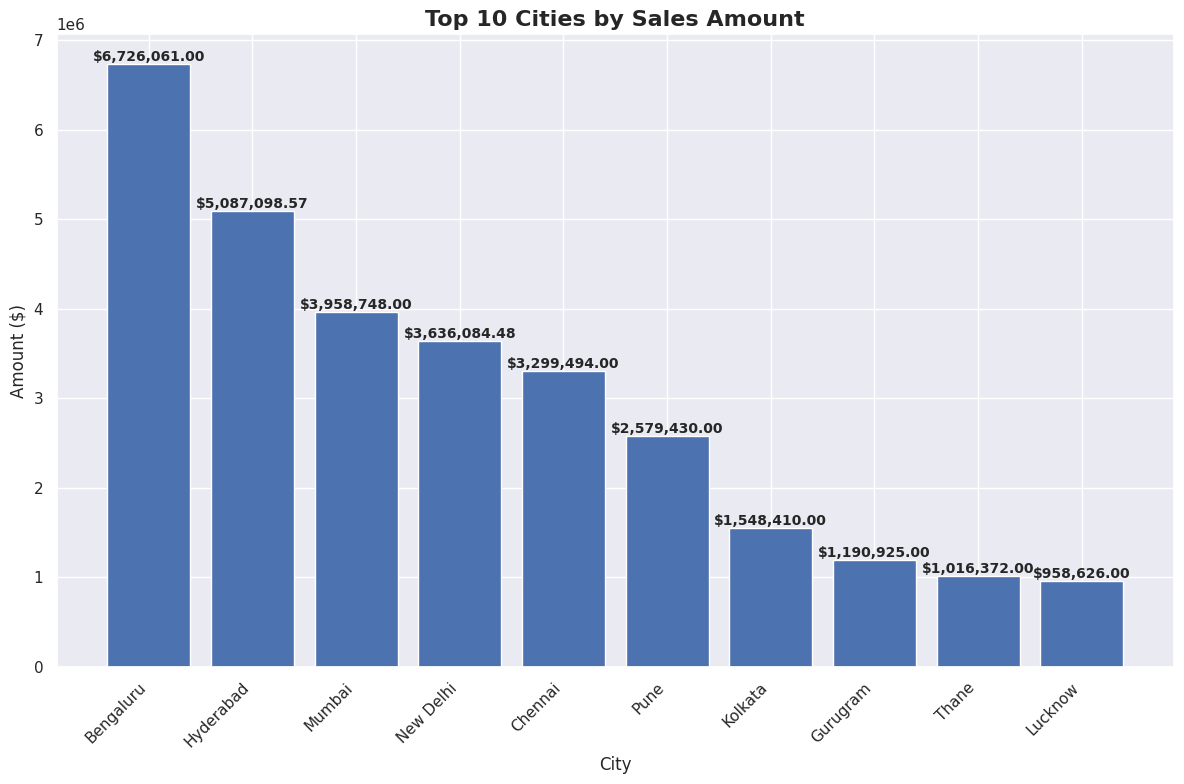

In [ ]:
top_cities = df.groupby('ship_city')['amount'].sum().sort_values(ascending=False)
print(top_cities.head(10))

plt.figure(figsize=(12, 8))
top_10_cities = top_cities.head(10)
bars = plt.bar(top_10_cities.index, top_10_cities.values)

plt.title('Top 10 Cities by Sales Amount', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

3. Sales by State

ship_state
Maharashtra       12235024.00
Karnataka          9648714.00
Telangana          6294192.57
Uttar Pradesh      6184900.00
Tamil Nadu         5959741.00
Delhi              4052167.48
Kerala             3378910.00
West Bengal        3208440.00
Andhra Pradesh     2887260.00
Haryana            2655377.00


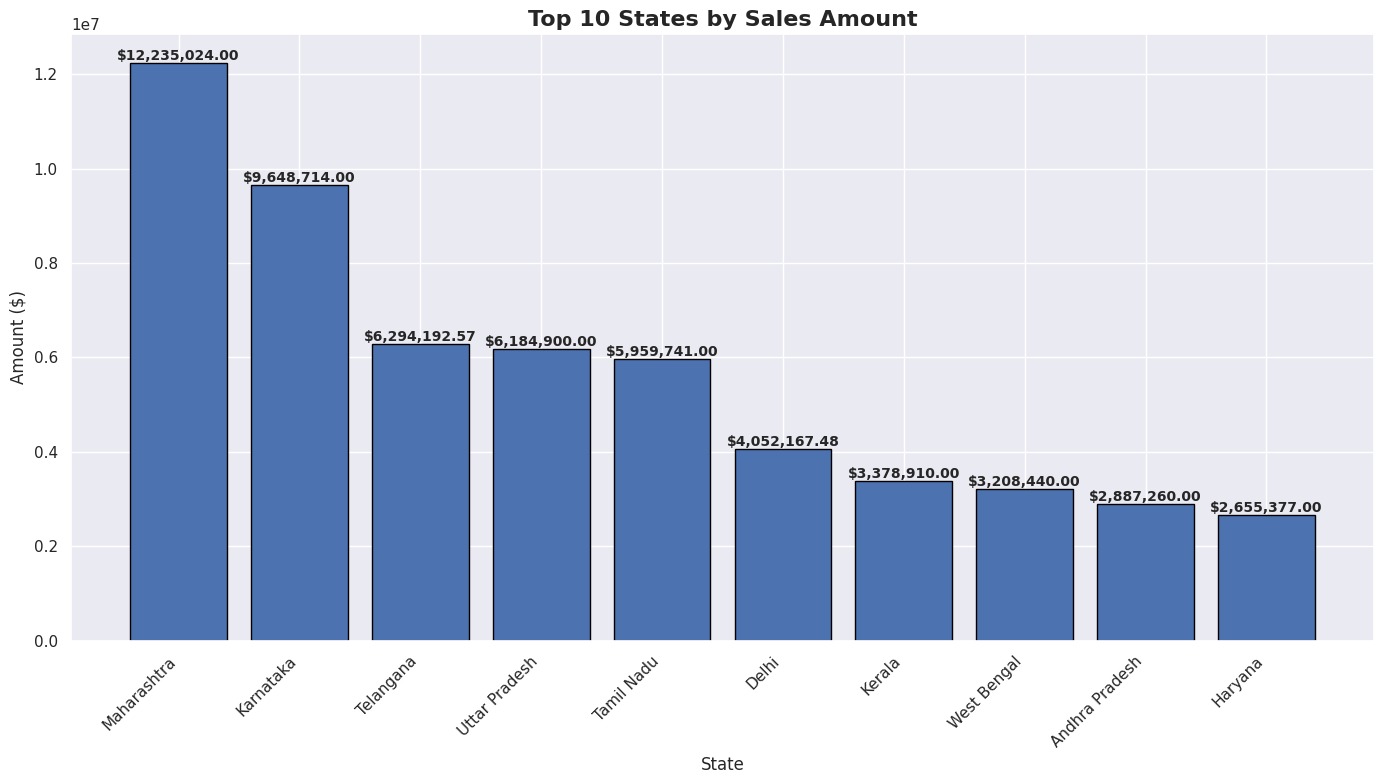

In [ ]:
top_states = get_top_n(df, 'ship_state', 'amount', n=10)
print(top_states.to_string())

plt.figure(figsize=(14, 8))
bars = plt.bar(top_states.index, top_states.values, edgecolor='black')

plt.title('Top 10 States by Sales Amount', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

4. B2B vs. B2C Behavior

In [ ]:
b2b_sales = df.groupby('b2b')['amount'].sum()
b2b_counts = df.groupby('b2b')['order_id'].nunique()

print("B2B vs. B2C Analysis:")
print(f"B2C Orders (False): {b2b_counts.get(False, 0):,} orders")
print(f"B2B Orders (True): {b2b_counts.get(True, 0):,} orders")
print("Conclusion: The business is overwhelmingly B2C, with B2C orders making up over 99% of all sales. B2B contributes less than 1%, indicating it is currently a small segment and a potential area for future growth.")

B2B vs. B2C Analysis:
B2C Orders (False): 119,558 orders
B2B Orders (True): 794 orders
Conclusion: The business is overwhelmingly B2C, with B2C orders making up over 99% of all sales. B2B contributes less than 1%, indicating it is currently a small segment and a potential area for future growth.


LOGISTICS & FULFILLMENT OPTIMIZATION

1. Shipping Service Level Analysis

In [ ]:
service_level_counts = df['ship_service_level'].value_counts()
print("Orders by Ship-Service-Level:")
print(service_level_counts.to_string())

Orders by Ship-Service-Level:
ship_service_level
Expedited    88590
Standard     40353


2. Fulfillment Comparison (Amazon vs. Merchant)



fulfilment
Amazon      50707093.00
Merchant    21083007.62
Name: amount, dtype: float64


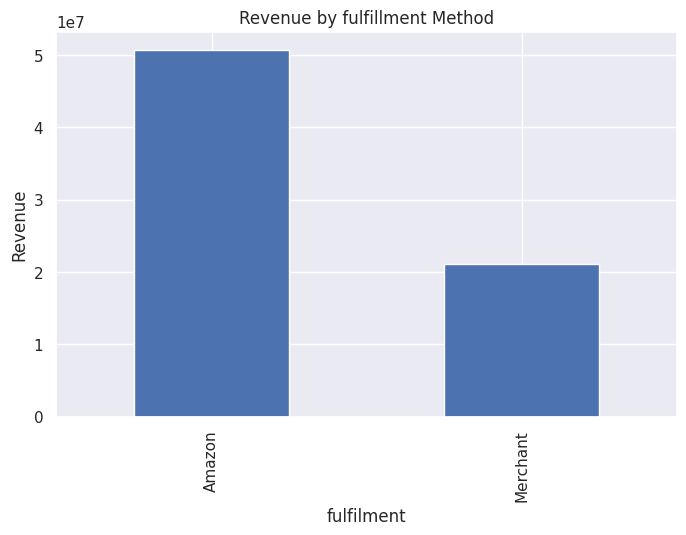

In [ ]:
fulfillment_sales = df.groupby('fulfilment')['amount'].sum().sort_values(ascending=False)
print(fulfillment_sales)

fulfillment_sales.plot(kind='bar', figsize=(8,5))
plt.title("Revenue by fulfillment Method")
plt.ylabel("Revenue")
plt.show()

3. Order by Status

status
Shipped             77772
Delivered           28771
Cancelled           18338
Returned             2098
Picked Up             973
Pending               939
Out for Delivery       35
Rejected               11
Lost                    5
Damaged                 1
Name: count, dtype: int64


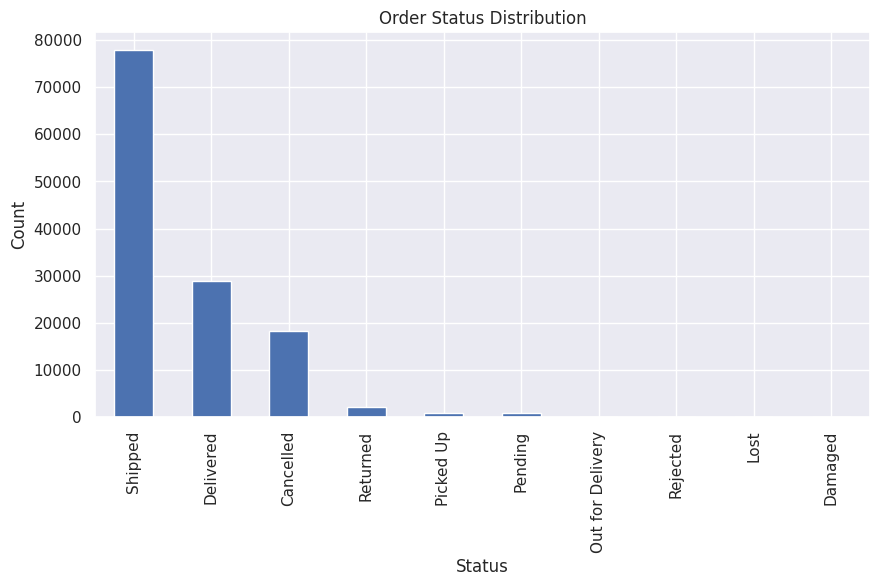

In [ ]:
status_counts = df['status'].value_counts()
print(status_counts)

status_counts.plot(kind='bar', figsize=(10,5))
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

PRODUCT MANAGEMENT & INVENTORY OPTIMIZATION

1. Top-Performing Style & Size

In [ ]:
top_size = df.groupby('size')['qty'].sum().nlargest(3)
top_style = df.groupby('style')['qty'].sum().nlargest(3)
print("Top 3 Styles by Quantity:")
print(top_style.to_string())
print("Top 3 Sizes by Quantity:")
print(top_size.to_string())

Top 3 Styles by Quantity:
style
JNE3797    3693
JNE3405    2066
SET268     1732
Top 3 Sizes by Quantity:
size
M     20449
L     19993
XL    18928


2. Top Categories by Quantity

In [ ]:
top_categories = get_top_n(df, 'category', 'qty', n=5)
print("Top 5 Categories by Total Quantity Ordered:")
print(top_categories.to_string())

Top 5 Categories by Total Quantity Ordered:
category
Set              45286
Kurta            45048
Western Dress    13943
Top               9902
Ethnic Dress      1052


CUSTOMER SATISFACTION & RETURNS

1. Product check

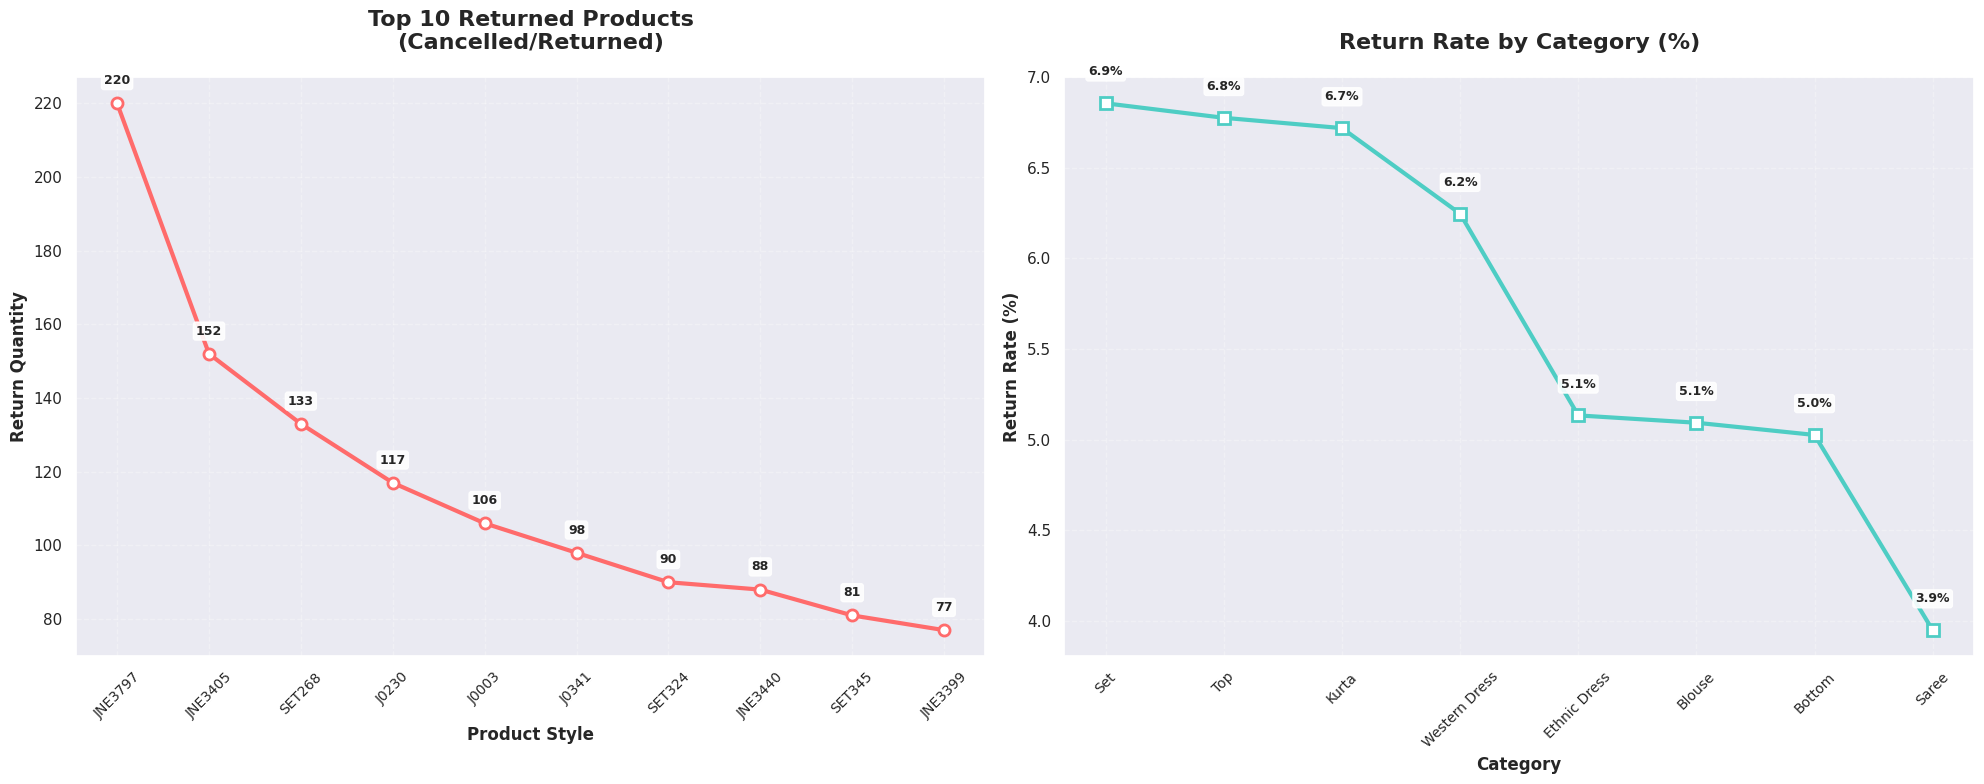

Top 10 Returned Products (by quantity):
style
JNE3797    220
JNE3405    152
SET268     133
J0230      117
J0003      106
J0341       98
SET324      90
JNE3440     88
SET345      81
JNE3399     77
Name: qty, dtype: int64

Return Rate by Category (%):
category
Set              6.856424
Top              6.776409
Kurta            6.719499
Western Dress    6.246862
Ethnic Dress     5.133080
Blouse           5.092593
Bottom           5.025126
Saree            3.947368
Dupatta               NaN
Name: qty, dtype: float64


In [ ]:
returns = df[df['status'].isin(['Cancelled','Returned'])]
returns_by_style = returns.groupby('style')['qty'].sum().sort_values(ascending=False)

return_rate = returns.groupby('category')['qty'].sum() / df.groupby('category')['qty'].sum() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

top_10_returns = returns_by_style.head(10)
line1 = ax1.plot(top_10_returns.index, top_10_returns.values,
                 marker='o', linewidth=3, markersize=8, color='#ff6b6b', markerfacecolor='white', markeredgewidth=2)

ax1.set_title('Top 10 Returned Products\n(Cancelled/Returned)', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Product Style', fontsize=12, fontweight='bold')
ax1.set_ylabel('Return Quantity', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')

for i, (style, qty) in enumerate(top_10_returns.items()):
    ax1.text(i, qty + (0.02 * max(top_10_returns.values)), f'{qty:,}',
             ha='center', va='bottom', fontsize=9, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.9))

return_rate_sorted = return_rate.sort_values(ascending=False)
line2 = ax2.plot(return_rate_sorted.index, return_rate_sorted.values,
                 marker='s', linewidth=3, markersize=8, color='#4ecdc4', markerfacecolor='white', markeredgewidth=2)

ax2.set_title('Return Rate by Category (%)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Return Rate (%)', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')

for i, (category, rate) in enumerate(return_rate_sorted.items()):
    ax2.text(i, rate + (0.02 * max(return_rate_sorted.values)), f'{rate:.1f}%',
             ha='center', va='bottom', fontsize=9, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.9))

plt.tight_layout()
plt.show()

print("Top 10 Returned Products (by quantity):")
print(returns_by_style.head(10))
print("\nReturn Rate by Category (%):")
print(return_rate.sort_values(ascending=False))

Other Finding

1. cancelled_orders

In [ ]:
cancelled_orders = df[df['status'] == 'Cancelled']

total_cancelled = len(cancelled_orders)
print("Total Cancelled Orders:", total_cancelled)

Total Cancelled Orders: 18338


In [ ]:
may_orders = df[df['date'].dt.month == 5]

total_revenue_may = may_orders['amount'].sum()

print("Total Revenue in May:", round(total_revenue_may, 2))

Total Revenue in May: 23987615.0


In [ ]:
june_orders = df[df['date'].dt.month == 6]


total_revenue_june = june_orders['amount'].sum()

print("Total Revenue Generated in June:", round(total_revenue_june, 2))

Total Revenue Generated in June: 21421323.0


In [ ]:
m_set_orders = df[(df['size'] == 'M') & (df['category'] == 'Set')]

total_qty_m_set = m_set_orders['qty'].sum()

print("Total Quantity Sold in Size M from Set:", total_qty_m_set)

Total Quantity Sold in Size M from Set: 8357


In [ ]:
sales_by_date = df.groupby('date')['amount'].sum()

max_sales_date = sales_by_date.idxmax()
max_sales_value = sales_by_date.max()

print("Date with Highest Sales:", max_sales_date)
print("Sales Amount on that Date:", round(max_sales_value, 2))

Date with Highest Sales: 2022-05-04 00:00:00
Sales Amount on that Date: 1108697.0


In [ ]:
cancel_rate_by_month = (
    df.groupby(df['date'].dt.month)
    .apply(lambda x: (x[x['courier_status']=='Cancelled'].shape[0] / x.shape[0]) * 100)
)

print(cancel_rate_by_month)

date
3    5.263158
4    4.596787
5    4.460887
6    4.755334
dtype: float64


In [ ]:
sales_by_city = df.groupby('ship_city')['amount'].sum().sort_values(ascending=False)

second_city = sales_by_city.index[1]
second_city_sales = sales_by_city.iloc[1]

print("City with 2nd Highest Sales:", second_city)
print("Sales Amount:", round(second_city_sales, 2))

City with 2nd Highest Sales: Hyderabad
Sales Amount: 5087098.57


In [ ]:
total_revenue = df['amount'].sum()
print("Total Revenue: ", total_revenue)

Total Revenue:  71790100.62


In [ ]:
monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['amount'].sum()
print(monthly_revenue)

date
2022-03       95432.00
2022-04    26285730.62
2022-05    23987615.00
2022-06    21421323.00
Freq: M, Name: amount, dtype: float64


In [ ]:
weekly_revenue = df.groupby(df['date'].dt.day_name())['amount'].sum()
print(weekly_revenue)

date
Friday        9864498.00
Monday       10302034.00
Saturday     10305608.62
Sunday       11013448.00
Thursday      9492757.00
Tuesday      10492193.00
Wednesday    10319562.00
Name: amount, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128943 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            128943 non-null  object        
 1   date                128943 non-null  datetime64[ns]
 2   status              128943 non-null  object        
 3   fulfilment          128943 non-null  object        
 4   sales_channel       128943 non-null  object        
 5   ship_service_level  128943 non-null  object        
 6   style               128943 non-null  object        
 7   sku                 128943 non-null  object        
 8   category            128943 non-null  object        
 9   size                128943 non-null  object        
 10  asin                128943 non-null  object        
 11  courier_status      128943 non-null  object        
 12  qty                 128943 non-null  int64         
 13  currency            128943 non-nul

In [ ]:
from google.colab import files
output_filename = 'cleaned_sales_data.csv'
df.to_csv(output_filename, index=False)
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Summary

The analysis of Ecommerce and retail data from March to June 2022 shows that the business has strong sales potential in specific key areas, but also with substantial operational and quality challenges.


***Financial Peformance***

Revenue Summary (March–June 2022)

*   Total revenue for the four months was INR 71.8 million.

*   March started very low, but April saw a major jump in sales, reaching INR 26.3 million.

*  Sales in May and June dropped slightly, but still stayed strong compared to March.

*   The big rise in April suggests that customer demand increased sharply, or a promotion worked very well.

Overall, revenue became much higher and more stable after April.

***Returns and Cancellations***


*   Set (6.86%), Top (6.78%), Kurta (6.72%), and Western Dress (6.25%) recorded the highest return rates. These are mostly higher-value items, suggesting customers are more likely to return premium products.

*   The overall cancellation rate is 14.29%, which is fairly high and should be monitored closely to prevent revenue loss.::



Order Fulfillment


*   Amazon generated the bulk of our revenue at INR 50.7 million, far more than Merchant Fulfillment (INR 21.1 million), confirming that Amazon remains our strongest sales channel.

*   Most orders were successfully Shipped or Delivered (106,543 total), but 21,350 orders were returned, cancelled, or still pending—showing clear opportunities to strengthen our delivery and fulfillment processes.



***Category Performance***


* The Set category led revenue generation, contributing approximately INR 35.8 million and accounting for over 40% of total revenue among the top products.

* Following this, Kurta and Western Dress were significant contributors, with revenues of around INR 19.5 million and INR 10.2 million, respectively.

Together, these three categories generated roughly INR 65.5 million, representing 80–85% of total sales.

* Other categories, including Saree, Bottom, Blouse, Dupatta, and Ethnic Dress, each accounted for less than 1% of revenue, highlighting their limited impact on overall earnings.

* In terms of order volume, the top five products were Set, Kurta, Western Dress, Top, and Ethnic Dress, with 45,286; 45,048; 13,943; 9,902; and 1,052 orders, respectively, and an average order value of INR 596.5.




***B2B vs. B2C Revenue***


*   The business is largely driven by B2C customers, generating about INR 71.2 million in revenue, compared to only INR 0.56 million from B2B sales.

*   Clear differences in buying patterns between B2B and B2C buyers provide useful insights into how each group shops and what they value.



***Distribution by Region***


*   The top cities by shipping revenue were Bengaluru (INR 6.7 million), Hyderabad (INR 5.1 million), Mumbai (INR 4.0 million), and New Delhi (INR 3.6 million).
*   At the state level, Maharashtra (INR 12.2 million), Karnataka (INR 9.6 million), Telangana (INR 6.3 million), and Uttar Pradesh (INR 6.2 million) led in revenue generation.

*   Revenue is predominantly concentrated in metropolitan areas, reflecting stronger demand in urban markets.

Overall, this analysis provides a clear view of sales performance, customer trends, and the regional distribution of revenue across key segments.


***Recommendations***

1. **Maximize Revenue from Top Products**

Focus marketing, promotions, and bundling strategies on high-performing categories; Set, Kurta, and Western Dress to drive growth. Analyze return patterns and improve product descriptions, sizing charts, and quality to reduce returns.

**2. Strengthen Fulfillment and Delivery**

Reduce the 14.3% cancellation rate by streamlining order processing, returns, and shipping workflows. Enhance merchant fulfillment capabilities to diversify sales channels and reduce dependence on Amazon.

**3. Expand B2B Sales Channels**

Explore growth opportunities in the B2B segment through corporate partnerships, bulk pricing, and tailored programs, increasing revenue from business clients.

**4. Target High-Revenue Regions**

Concentrate marketing and operational efforts in top-performing cities and states such as Bengaluru, Hyderabad, Mumbai, New Delhi, Maharashtra, Karnataka, and Telangana. Evaluate underperforming regions for expansion opportunities.

**5. Revitalize Low-Performing Categories**

Boost sales of Saree, Bottom, Blouse, Dupatta, and Ethnic Dress through targeted campaigns, discounts, and bundled offers, enhancing their revenue contribution.

**6. Increase Average Order Value (AOV)**

Encourage upselling, cross-selling, and product bundles to raise AOV, especially for premium items, driving overall profitability.

***Thank You***